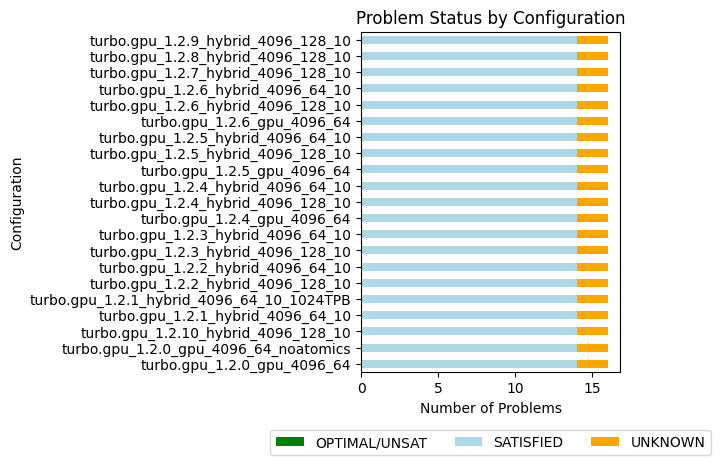

,uid,version,machine,short_uid,avg_nodes_per_second,median_nodes_per_second,avg_normalized_nodes_per_second,best_nodes_per_second,avg_fp_iterations_per_second,median_fp_iterations_per_second,avg_normalized_fp_iterations_per_second,best_fp_iterations_per_second,avg_fp_iterations,median_fp_iterations,avg_normalized_fp_iterations,best_fp_iterations,avg_propagator_mem_mb,median_propagator_mem_mb,avg_normalized_propagator_mem_mb,best_propagator_mem_mb,avg_store_mem_kb,avg_normalized_store_mem_kb,best_store_mem_kb,median_store_mem_kb,problem_optimal,problem_sat,problem_unknown,problem_with_store_shared,problem_with_props_shared,idle_eps_workers
18,turbo.gpu.release_1.2.7_precision5820_300s_hybrid_4096_128_10,1.2.7,precision5820,turbo.gpu_1.2.7_hybrid_4096_128_10,36740.428896,24641.672212,0.0,0,1.002541e+06,301143.617675,0.0,0,22.363411,15.223138,0.0,16,0.854349,0.422844,0.0,16,402.7450,0.0,16,208.200,0,14,2,3,0,2.0
20,turbo.gpu.release_1.2.9_precision5820_300s_hybrid_4096_128_10,1.2.9,precision5820,turbo.gpu_1.2.9_hybrid_4096_128_10,36737.855708,24625.155220,0.0,0,9.568090e+05,231519.750611,0.0,0,20.911527,12.617777,0.0,16,0.854349,0.422844,0.0,16,402.7450,0.0,16,208.200,0,14,2,3,0,2.0
19,turbo.gpu.release_1.2.8_precision5820_300s_hybrid_4096_128_10,1.2.8,precision5820,turbo.gpu_1.2.8_hybrid_4096_128_10,36011.347191,24397.882182,0.0,0,1.009733e+06,257565.674342,0.0,0,22.170866,17.639286,0.0,16,0.854349,0.422844,0.0,16,402.7450,0.0,16,208.200,0,14,2,3,0,2.0
2,turbo.gpu.release_1.2.10_precision5820_300s_hybrid_4096_128_10,1.2.10,precision5820,turbo.gpu_1.2.10_hybrid_4096_128_10,35871.115209,24462.835132,0.0,0,9.631198e+05,283839.587852,0.0,0,21.689427,14.242996,0.0,16,0.854349,0.422844,0.0,16,402.7450,0.0,16,208.200,0,14,2,3,0,2.0
16,turbo.gpu.release_1.2.6_precision5820_300s_hybrid_4096_128_10,1.2.6,precision5820,turbo.gpu_1.2.6_hybrid_4096_128_10,35627.130369,24587.019618,0.0,0,4.867221e+05,230609.508184,0.0,0,16.574447,12.186346,0.0,16,0.854349,0.422844,0.0,16,402.7450,0.0,16,208.200,0,14,2,3,0,2.0
13,turbo.gpu.release_1.2.5_precision5820_300s_hybrid_4096_128_10,1.2.5,precision5820,turbo.gpu_1.2.5_hybrid_4096_128_10,34106.537442,16978.009200,0.0,0,1.101523e+06,418888.348677,0.0,0,42.511921,25.339931,0.0,16,0.854349,0.422844,0.0,16,402.7450,0.0,16,208.200,0,14,2,3,0,2.0
10,turbo.gpu.release_1.2.4_precision5820_300s_hybrid_4096_128_10,1.2.4,precision5820,turbo.gpu_1.2.4_hybrid_4096_128_10,21808.768268,6061.181053,0.0,0,8.454839e+05,143327.931122,0.0,0,40.448637,22.763712,0.0,16,0.854349,0.422844,0.0,16,402.7450,0.0,16,208.200,0,14,2,3,0,1.0
17,turbo.gpu.release_1.2.6_precision5820_300s_hybrid_4096_64_10,1.2.6,precision5820,turbo.gpu_1.2.6_hybrid_4096_64_10,21593.351324,14289.315506,0.0,0,2.860325e+05,160846.495181,0.0,0,16.176846,12.223745,0.0,16,0.854349,0.422844,0.0,16,402.7450,0.0,16,208.200,0,14,2,3,0,2.0
14,turbo.gpu.release_1.2.5_precision5820_300s_hybrid_4096_64_10,1.2.5,precision5820,turbo.gpu_1.2.5_hybrid_4096_64_10,19511.439664,9596.925334,0.0,0,5.944666e+05,300374.881569,0.0,0,41.440812,25.413794,0.0,16,0.854349,0.422844,0.0,16,402.7450,0.0,16,208.200,0,14,2,3,0,2.0
7,turbo.gpu.release_1.2.3_precision5820_300s_hybrid_4096_128_10,1.2.3,precision5820,turbo.gpu_1.2.3_hybrid_4096_128_10,18543.266493,4082.876687,0.0,0,1.294592e+05,48995.621710,0.0,0,17.003537,9.186541,0.0,16,8.818212,3.744472,0.0,16,49.2545,0.0,16,10.708,0,14,2,11,0,2.0


| Metrics | Normalized average [0,100] | Δ v1.2.5 | #best (_/16) | Average | Δ v1.2.5 | Median | Δ v1.2.5 |
|---------|----------------------------|----------|--------------|---------|----------|--------|----------|
| Nodes per second | 98.59 | +23% | 13 | 35627.13 | +4% | 24587.02 | +45% |
| Fixpoint iterations per second | 59.61 | -40% | 0 | 486722.09 | -56% | 230609.51 | -45% |
| Fixpoint iterations per node | 47.01 | -53% | 16 | 16.57 | -61% | 12.19 | -52% |
| Propagators memory | 100.00 | 0% | 0 | 0.85MB | 0% | 0.42MB | 0% |
| Variables store memory | 100.00 | 0% | 0 | 402.75KB | 0% | 208.20KB | 0% |

| Metrics | Count | Δ v1.2.5 |
|---------|-------|----------|
| #Problems at optimality | 0 | 0 | 
| #Problems satisfiable | 14 | 14  |
| #Problems unknown | 2 | 2  |
| #Problem with store in shared memory | 3 | 3  |
| #Problem with prop in shared memory | 0 | 0  |
| #Problems with IDLE SMs at timeout | 2 | 2 |
| Metrics | Normalized average [0,100] | Δ v1.2.5 | #best (_/16) | Averag

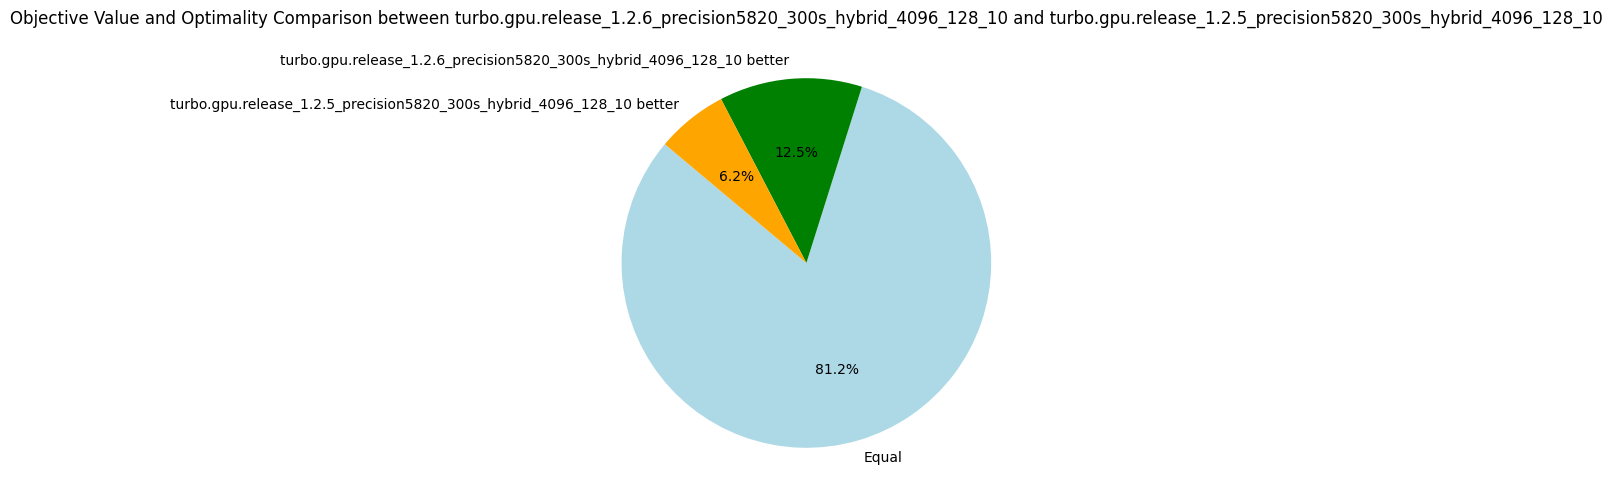

                                                                                                          method  \
uid                                                turbo.gpu.release_1.2.5_precision5820_300s_hybrid_4096_128_10   
data_file                                                                                                          
../data/mzn-challenge/2022/accap/accap_a40_f800...                                           minimize              

                                                                                                                  \
uid                                                turbo.gpu.release_1.2.6_precision5820_300s_hybrid_4096_128_10   
data_file                                                                                                          
../data/mzn-challenge/2022/accap/accap_a40_f800...                                           minimize              

                                                                      

In [4]:
import importlib
import analysis
from IPython.display import HTML, display
import pandas as pd

importlib.reload(analysis)

pd.options.mode.copy_on_write = True

df = analysis.read_experiments([
  # "../campaign/precision5820/com.google.ortools.sat-v9.9.csv",
  # "../campaign/precision5820/com.google.ortools.sat.noglobal-v9.9.csv",
  # "../campaign/precision5820/com.google.ortools.sat-v9.9-par.csv",
  # "../campaign/precision5820/org.choco.choco-v4.10.15-java11.csv",
  # "../campaign/precision5820/org.choco.choco-v4.10.15-par-java11.csv",
  # "../campaign/precision5820/org.choco.choco-v4.10.15.csv",
  # "../campaign/precision5820/org.choco.choco-v4.10.15-par.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.1.7-A5000.csv",
  # "../campaign/precision5820/turbo.cpu.release-v1.2.0.csv",
  "../campaign/precision5820/turbo.gpu.release-v1.2.0.csv",
  "../campaign/precision5820/turbo.gpu.release-v1.2.1.csv",
  "../campaign/precision5820/turbo.gpu.release-v1.2.2.csv",
  "../campaign/precision5820/turbo.gpu.release-v1.2.3.csv",
  # "../campaign/helios/turbo.gpu.release-v1.2.2.csv",
  # "../campaign/helios/turbo.gpu.release-v1.2.3.csv",
  "../campaign/precision5820/turbo.gpu.release-v1.2.4.csv",
  "../campaign/precision5820/turbo.gpu.release-v1.2.5.csv",
  "../campaign/precision5820/turbo.gpu.release-v1.2.6.csv",
  "../campaign/precision5820/turbo.gpu.release-v1.2.7.csv",
  "../campaign/precision5820/turbo.gpu.release-v1.2.8.csv",
  "../campaign/precision5820/turbo.gpu.release-v1.2.9.csv",
  "../campaign/precision5820/turbo.gpu.release-v1.2.10.csv"
  # "../campaign/precision5820/turbo.gpu.release-v1.2.5.csv",
  # "../campaign/iris/turbo.gpu.release-v1.2.4.csv"
  # "../campaign/precision5820/turbo.cpu.release-v1.2.4.csv"
])
# df.to_csv("test.csv", index=False)
# df = df[~(df['problem'] == "rcpsp")]
# df = df[df['problem'] == "rcpsp"]

# Because globalmem was only benchmarked on problems that could fit in shared memory.
# But we don't want to remove the others for most of the analysis. (comment the line if you want to analyse the globalmem results)
df = df[df['uid'] != "turbo.gpu.release_1.2.0_precision5820_300s_gpu_4096_64_globalmem"]

df = analysis.intersect(df)

# analysis.show_problem_table(df[df['uid'] == "turbo.gpu.release_1.2.4_precision5820_300s_hybrid_4096_128"])

analysis.plot_overall_result(df)
# display(HTML(analysis.metrics_table(df[df['mzn_solver'].str.startswith("turbo")]).to_html()))
metrics = analysis.metrics_table(df)
display(HTML(metrics.to_html()))
# sorted_metrics = metrics.sort_values(by=['problem_optimal', 'problem_sat', 'avg_nodes_per_second', 'version'], ascending=[False, False, False, True])
# print(sorted_metrics[['short_uid','avg_nodes_per_second','problem_optimal', 'problem_sat', 'problem_unknown']].to_markdown(index=False))

# analysis.plot_time_distribution("hybrid128", df[df['uid'] == "turbo.gpu.release_1.2.4_precision5820_300s_hybrid_4096_128"])
# analysis.plot_time_distribution("gpu80", df[df['uid'] == "turbo.gpu.release_1.2.4_iris_300s_gpu_4096_80"])
# analysis.plot_time_distribution("hybrid80-14", df[df['uid'] == "turbo.gpu.release_1.2.4_iris_300s_hybrid_4096_80_14"])
# analysis.plot_time_distribution("hybrid80-28", df[df['uid'] == "turbo.gpu.release_1.2.4_iris_300s_hybrid_4096_80_28"])
# analysis.plot_time_distribution("hybrid160-14", df[df['uid'] == "turbo.gpu.release_1.2.4_iris_300s_hybrid_4096_160_14"])
# analysis.plot_time_distribution("hybrid160-28", df[df['uid'] == "turbo.gpu.release_1.2.4_iris_300s_hybrid_4096_160_28"])
# analysis.plot_time_distribution("gpu", df[df['uid'] == "turbo.gpu.release_1.2.5_precision5820_300s_gpu_4096_64"])
# analysis.plot_time_distribution("hybrid64", df[df['uid'] == "turbo.gpu.release_1.2.5_precision5820_300s_hybrid_4096_64_10"])
# analysis.plot_time_distribution("hybrid128", df[df['uid'] == "turbo.gpu.release_1.2.5_precision5820_300s_hybrid_4096_128_10"])
# analysis.plot_time_distribution("hybrid128", df[df['uid'] == "turbo.gpu.release_1.2.4_precision5820_300s_hybrid_4096_128_10"])

analysis.comparison_table_md(df, "turbo.gpu.release_1.2.5_precision5820_300s_hybrid_4096_128_10", "turbo.gpu.release_1.2.6_precision5820_300s_hybrid_4096_128_10")
analysis.comparison_table_md(df, "turbo.gpu.release_1.2.5_precision5820_300s_hybrid_4096_128_10", "turbo.gpu.release_1.2.7_precision5820_300s_hybrid_4096_128_10")
analysis.comparison_table_md(df, "turbo.gpu.release_1.2.5_precision5820_300s_hybrid_4096_128_10", "turbo.gpu.release_1.2.8_precision5820_300s_hybrid_4096_128_10")
analysis.comparison_table_md(df, "turbo.gpu.release_1.2.5_precision5820_300s_hybrid_4096_128_10", "turbo.gpu.release_1.2.9_precision5820_300s_hybrid_4096_128_10")
analysis.comparison_table_md(df, "turbo.gpu.release_1.2.5_precision5820_300s_hybrid_4096_128_10", "turbo.gpu.release_1.2.10_precision5820_300s_hybrid_4096_128_10")

# print(analysis.list_problem_where_leq(df, "nodes", "turbo.gpu.release_1.2.0_precision5820_300s_4096_64_256", "turbo.gpu.release_1.2.1_precision5820_300s_4096_64_1024"))

# p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.0_precision5820_300s_4096_64_256", "turbo.gpu.release_1.2.2_precision5820_300s_4096_64_256")
# print(p[p['Comparison'] == 'turbo.gpu.release_1.1.7_precision5820_300s_4096_64_256 better'])

p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.6_precision5820_300s_hybrid_4096_128_10", "turbo.gpu.release_1.2.5_precision5820_300s_hybrid_4096_128_10")
print(p[p['Comparison'] == 'turbo.gpu.release_1.2.5_precision5820_300s_hybrid_4096_128_10 better'])

# df[(df['uid'] == "turbo.gpu.release_1.2.0_precision5820_300s_4096_64_256") & (df['memory_configuration'] != "global") & (df['eps_num_subproblems'] == 4096)]
# df[(df['mzn_solver'] == "turbo.gpu.release") & (df['problem'] == "nfc") & (df['eps_num_subproblems'] == 4096)]